<a href="https://colab.research.google.com/github/frukkurt/OCR_PTVN/blob/main/Cascade_TabNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CascadeTabNet Demo Notebook
[![PWC](https://img.shields.io/endpoint.svg?url=https://paperswithcode.com/badge/cascadetabnet-an-approach-for-end-to-end/table-detection-on-icdar2013-1)](https://paperswithcode.com/sota/table-detection-on-icdar2013-1?p=cascadetabnet-an-approach-for-end-to-end)
[![PWC](https://img.shields.io/badge/PyTorch-v1.4-blue)](https://pytorch.org/)
[![PWC](https://img.shields.io/badge/%20mmdetection%20-v1.2-blue)](https://github.com/open-mmlab/mmdetection)

> **CascadeTabNet: An approach for end to end table detection and structure recognition from image-based documents**<br>
> [Devashish Prasad](https://github.com/DevashishPrasad),
> [Ayan Gadpal](https://github.com/ayangadpal),
> [Kshitij Kapadni](https://github.com/kshitijkapadni),
> [Manish Visave](https://github.com/ManishDV),
> <br>
> [Preprint Link of Paper](https://arxiv.org/abs/2004.12629)<br>
> <a href="results.pdf">Supplementary file</a> <br>
> The paper has been accepted at [CVPR 2020 Workshop on Text and Documents in the Deep Learning Era](https://cvpr2020text.wordpress.com/)<br>
> [Code Link](https://github.com/DevashishPrasad/CascadeTabNet)
<img align="right" src="imgs/CVPR Teaser.gif" />

## 1. Install all the prerequisite
This will take a while, Remember to **Restart Runtime** after this step is done 

In [1]:
!pip install torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html
!pip install -q mmcv terminaltables
!git clone --branch v1.2.0 'https://github.com/open-mmlab/mmdetection.git'
%cd "mmdetection"
!pip install -r "/content/mmdetection/requirements/optional.txt"
!python setup.py install
!python setup.py develop
!pip install -r {"requirements.txt"}
!pip install pillow==6.2.1 
!pip install mmcv==0.4.3
%cd "/content"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 723.9 MB 23 kB/s 
     |████████████████████████████████| 4.0 MB 21.3 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.0+cu113
    Uninstalling torch-1.12.0+cu113:
      Successfully uninstalled torch-1.12.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.0+cu113
    Uninstalling torchvision-0.13.0+cu113:
      Successfully uninstalled torchvision-0.13.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.0 requires torch==1.12.0, but you have torch 1.4.0+cu100 which is incompatible.
torchaudio 0.12.0+cu113 requires torch==1.12.0, but you have torch 1.4.0+cu100 which

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
                 from /usr/local/lib/python3.7/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader/base.h:3,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader/stateful.h:3,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader.h:3,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/torch/csrc/api/include/torch/data.h:3,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/torch/csrc/api/include/torch/all.h:4,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/torch/extension.h:4,
                 from mmdet/ops/masked_conv/src/masked_conv2d_cuda.cpp:1:
/usr/local/lib/python3.7/dist-packages/torch/include/c10/util/Exception.h:355:40: warning: ‘void c10::detail::deprecated_AT_CHECK()’ is deprecated [-Wdepreca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 7.9 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 6.2.2
    Uninstalling Pillow-6.2.2:
      Successfully uninstalled Pillow-6.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.7 requires torch<1.13,>=1.7, but you have torch 1.4.0+cu100 which is incompatible.
fastai 2.7.7 requires torchvision>=0.8.2, but you have torchvision 0.5.0+cu100 which is incompatible.
bokeh 2.3.3 requires pillow>=7.1.0, but you have pillow 6.2.1 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 2.3 MB/s 
  Created wheel for mmcv: filename=mmcv-0.4.3-cp37-cp37m-linux_x86_64.whl size=172748 sha256=9f77f9f56c23df72f9d94f999b95fba67ce3f3d542c6117638e68cf695215e3e
  Stored in directory: /root/.cache/pip/wheels/0e/d1/95/11a3b3bfc1a6b81059a407214e7bb84fdbf6ecfd292a298e9f
Successfully built mmcv
  Attempting uninstall: mmcv
    Found existing installation: mmcv 1.6.0
    Uninstalling mmcv-1.6.0:
      Successfully uninstalled mmcv-1.6.0
/content


## 2. Clone the Repository 
We will be using "ICDAR 19 (Track B2 Modern) table structure recognition" for demo

In [1]:
!git clone https://github.com/DevashishPrasad/CascadeTabNet.git

Cloning into 'CascadeTabNet'...
remote: Enumerating objects: 675, done.
remote: Total 675 (delta 0), reused 0 (delta 0), pack-reused 675
Receiving objects: 100% (675/675), 16.55 MiB | 27.93 MiB/s, done.
Resolving deltas: 100% (328/328), done.


## 3. Download the Pretrained Model



In [2]:
!gdown "https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT"

Downloading...
From: https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT
To: /content/epoch_36.pth
100% 664M/664M [00:05<00:00, 132MB/s]


## 4. Run the Predictions

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


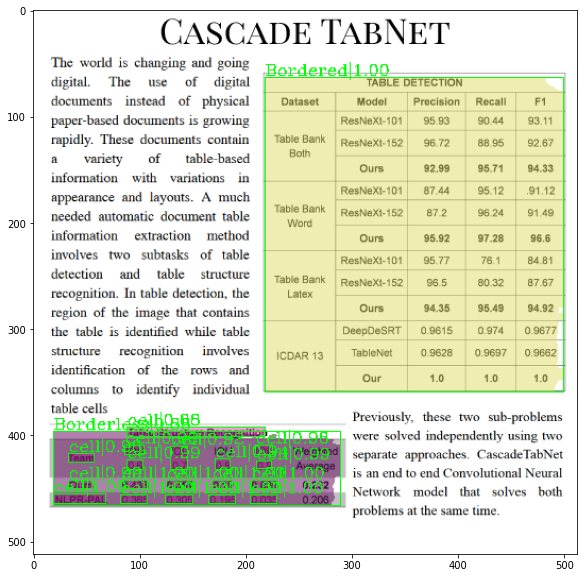

In [56]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
# Load model
config_file = '/content/CascadeTabNet/Config/cascade_mask_rcnn_hrnetv2p_w32_20e.py'
checkpoint_file = '/content/epoch_36.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')

# Test a single image 
img = "/content/CascadeTabNet/Demo/demo.png"

# Run Inference
result = inference_detector(model, img)

# Visualization results
show_result_pyplot(img, result,('Bordered', 'cell', 'Borderless'), score_thr=0.85)






In [59]:
def model_test(img,score_thr,show_img=True):
  # Load model
  config_file = '/content/CascadeTabNet/Config/cascade_mask_rcnn_hrnetv2p_w32_20e.py'
  checkpoint_file = '/content/epoch_36.pth'
  model = init_detector(config_file, checkpoint_file, device='cuda:0')
  result = inference_detector(model, img)


  
  if show_img==True:
    img_output=show_result_pyplot(img, result,('Bordered', 'cell', 'Borderless'), score_thr=score_thr)
  else:
    pass

  filter_output=list(filter(lambda c: len(c)>0, result[0]))

  return filter_output

**Note :** If you are getting "no module name mmdet" error, Please Restart the runtime by pressing "Crtl+M" OR going to the runtime (5th option, top left) and selecting Restart Runtime.

After this, use TSR postprocessing for best result

# 5.TEST OWN IMG

In [5]:
!gdown --folder https://drive.google.com/drive/folders/1fwt5vfoOJgu0f1RFDJ1Hr7Mnz48f9s6O?usp=sharing

Retrieving folder list
Processing file 1HSWx9eBOpxRCvmoiuXESlplggX0LwgVu test_img1.png
Processing file 1tvVv9WngDuIj0lUPFX1FMvqhUSCys_PH test_img2.png
Processing file 1bsymrtqm2anTWQoWebSpXVBT-FDfG_Cs test_img3.png
Processing file 1d5iK7CTMSnXFj_4xWlRowc4Ck_0M9K5O test_img4.png
Processing file 1U-Kj77LaxEOspUUIzBYpZ6syvqkgXBo5 test_img5.png
Processing file 1plbRWgvuG0icFcHfu5WRBhh9OUpxqtxR test_img6.png
Processing file 1vvF5_6bl4rOZEGT6MK5pvC8IdqR06yNr test_img7.png
Processing file 19UX8iOB9e0ZbVrsFzyENqrog7DdC7rLw test_img8.png
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1HSWx9eBOpxRCvmoiuXESlplggX0LwgVu
To: /content/test_img/test_img1.png
100% 116k/116k [00:00<00:00, 81.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1tvVv9WngDuIj0lUPFX1FMvqhUSCys_PH
To: /content/test_img/test_img2.png
100% 52.9k/52.9k [00:00<00:00, 98.4MB/s]
Downloading...
From: https://drive.googl

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


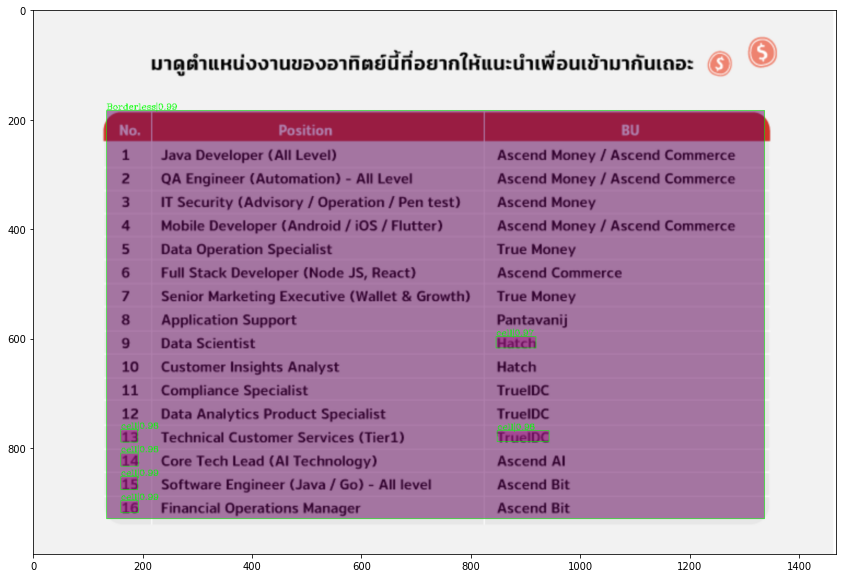

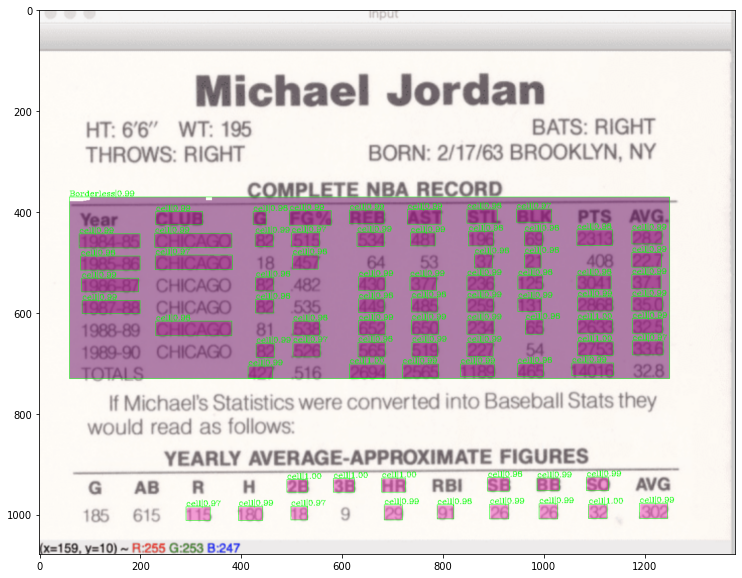

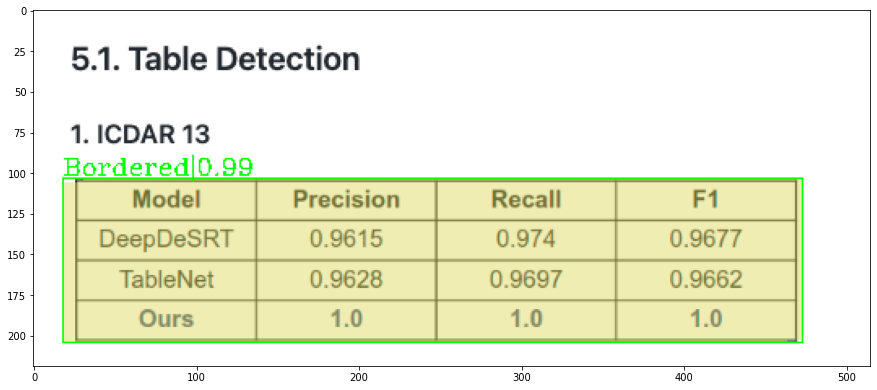

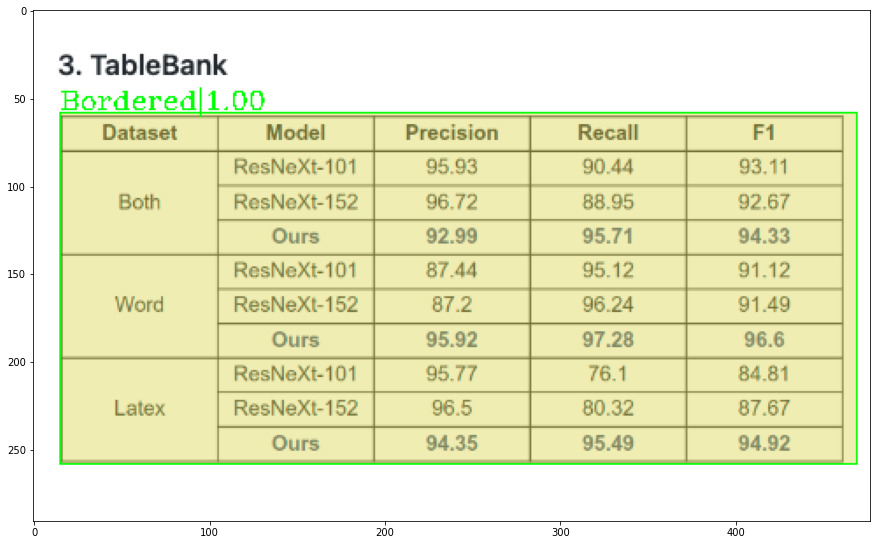

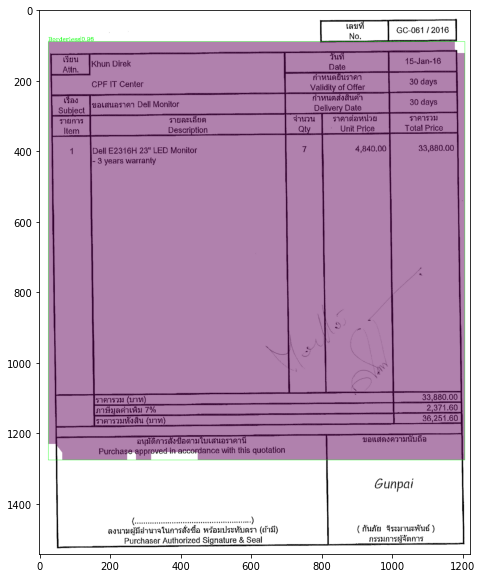

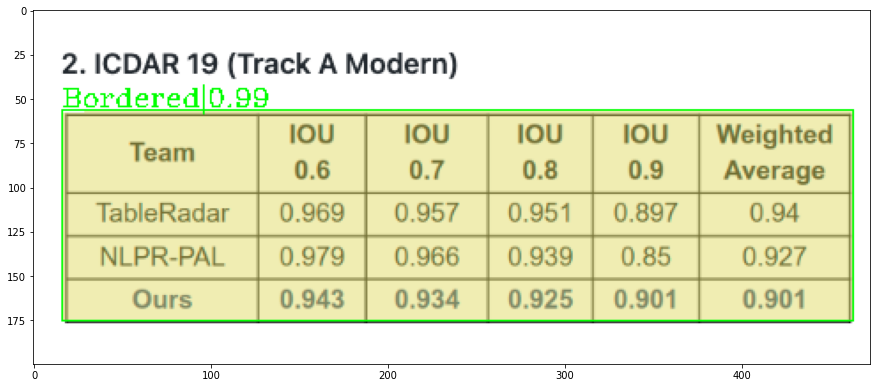

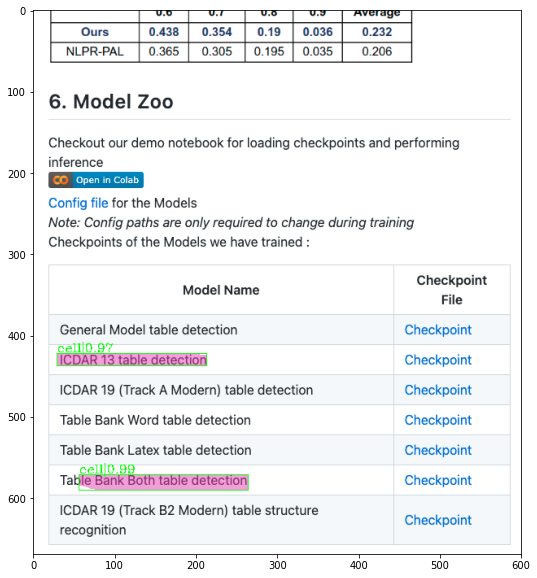

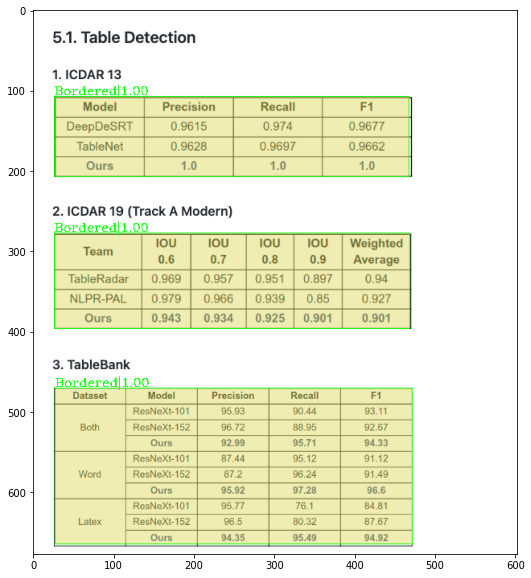

In [60]:
import os 
path_folder="/content/test_img/"
lisdr=os.listdir(path_folder)

for i in lisdr:
  img=path_folder+i

  res=model_test(img,0.97,show_img=True)


# Cite us
If you find this work useful for your research, please cite our paper:

```
@misc{ cascadetabnet2020,
    title={CascadeTabNet: An approach for end to end table detection and structure recognition from image-based documents},
    author={Devashish Prasad and Ayan Gadpal and Kshitij Kapadni and Manish Visave and Kavita Sultanpure},
    year={2020},
    eprint={2004.12629},
    archivePrefix={arXiv},
    primaryClass={cs.CV}
}
```


In [61]:
print("OK")

OK
